##Feature extraction and transformation

The focus of this notebook is to check the requirements needed to perform a good linear regression, from linear relationship, to normal distribution, to correlation and homoscedasticity.

In [ ]:
 import pandas as pd

data = pd.read_csv('/content/final_df.csv')

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


For some common locations in New York the  distannce from the dropoff location to the place is computed for each record, in order to obtain new features.

In [ ]:
import geopy.distance
def jfk_dist(trip):
    jfk_lat = 40.6413
    jfk_long = -73.7781
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    jfk_distance = geopy.distance.vincenty((dropoff_lat, dropoff_long), (jfk_lat, jfk_long)).km
    return jfk_distance

def lga_dist(trip):
    lga_lat = 40.7769
    lga_long = -73.8740
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    lga_distance = geopy.distance.vincenty((dropoff_lat, dropoff_long), (lga_lat, lga_long)).km
    return lga_distance

def ewr_dist(trip):
    ewr_lat = 40.6895
    ewr_long = -74.1745
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    ewr_distance = geopy.distance.vincenty((dropoff_lat, dropoff_long), (ewr_lat, ewr_long)).km
    return ewr_distance

def tsq_dist(trip):
    tsq_lat = 40.7580
    tsq_long = -73.9855
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    tsq_distance = geopy.distance.vincenty((dropoff_lat, dropoff_long), (tsq_lat, tsq_long)).km
    return tsq_distance

def cpk_dist(trip):
    cpk_lat = 40.7812
    cpk_long = -73.9665
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    cpk_distance = geopy.distance.vincenty((dropoff_lat, dropoff_long), (cpk_lat, cpk_long)).km
    return cpk_distance
def lib_dist(trip):
    lib_lat = 40.6892
    lib_long = -74.0445
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    lib_distance = geopy.distance.vincenty((dropoff_lat, dropoff_long), (lib_lat, lib_long)).km
    return lib_distance

def gct_dist(trip):
    gct_lat = 40.7527
    gct_long = -73.9772
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    gct_distance = geopy.distance.vincenty((dropoff_lat, dropoff_long), (gct_lat, gct_long)).km
    return gct_distance

def met_dist(trip):
    met_lat = 40.7794
    met_long = -73.9632
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    met_distance = geopy.distance.vincenty((dropoff_lat, dropoff_long), (met_lat, met_long)).km
    return met_distance

def wtc_dist(trip):
    wtc_lat = 40.7126
    wtc_long = -74.0099
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    wtc_distance = geopy.distance.vincenty((dropoff_lat, dropoff_long), (wtc_lat, wtc_long)).km
    return wtc_distance


In [ ]:
data['jfk'] = data.apply(lambda x: jfk_dist(x), axis = 1 )
data['lga'] = data.apply(lambda x: lga_dist(x), axis = 1 )
data['ewr'] = data.apply(lambda x: ewr_dist(x), axis = 1 )
data['tsq'] = data.apply(lambda x: tsq_dist(x), axis = 1 )
data['cpk'] = data.apply(lambda x: cpk_dist(x), axis = 1 )
data['lib'] = data.apply(lambda x: lib_dist(x), axis = 1 )
data['gct'] = data.apply(lambda x: gct_dist(x), axis = 1 )
data['met'] = data.apply(lambda x: met_dist(x), axis = 1 )    
data['wtc'] = data.apply(lambda x: wtc_dist(x), axis = 1 )
data.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,D,wd,month,year,hour,jfk,lga,ewr,tsq,cpk,lib,gct,met,wtc
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.029601,0,5,2009,17,9.537080,7.679949,28.247455,13.172418,13.032062,17.337612,12.302071,12.689203,14.220512
1,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389132,3,7,2011,0,21.719896,10.322356,16.903211,0.957795,3.992476,8.165833,1.209384,3.982655,4.500643
2,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.795790,5,3,2012,4,22.219331,10.143556,17.230250,0.512412,3.326249,8.861571,1.352943,3.366757,5.283860
3,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.998338,1,2,2010,7,21.861386,7.018719,21.170164,3.756995,0.878381,12.858090,3.860999,0.734762,9.092311
4,12.1,-74.000964,40.731630,-73.972892,40.758233,1,3.787980,3,0,2011,9,20.967717,8.602940,18.664893,1.064959,2.606942,9.765672,0.714055,2.488941,5.954150


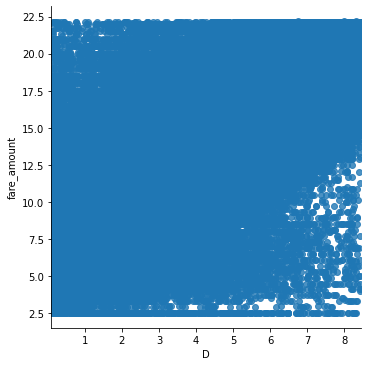

In [ ]:
sns.lmplot(x='D', y='fare_amount', data=data,order=1)     ## there is no linear relation betweeen the data

Check for linear relations between transformed distance features and  fare (not done for all features as they don't have a high correlation).

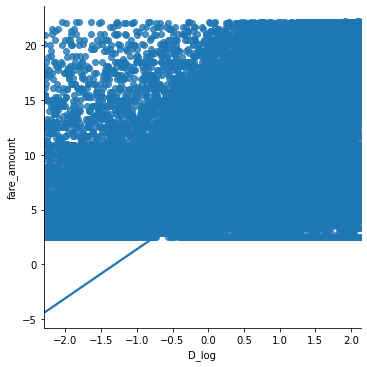

In [ ]:
data['D_log'] = np.log(data['D'])   # add D_log to dataset
sns.lmplot(x='D_log', y='fare_amount', data=data,order=1) 

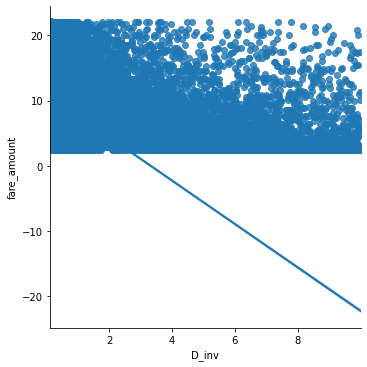

In [ ]:
data['D_inv'] = 1/(data['D'])   # inverese transformation of the distance
sns.lmplot(x='D_inv', y='fare_amount', data=data,order=1) 


((array([-4.8079561 , -4.62749065, -4.52990331, ...,  4.52990331,
          4.62749065,  4.8079561 ]),
  array([0.10003672, 0.10006036, 0.10015848, ..., 8.44308796, 8.44322007,
         8.44322241])),
 (1.5666752760454825, 2.462914200205465, 0.9460429422598249))

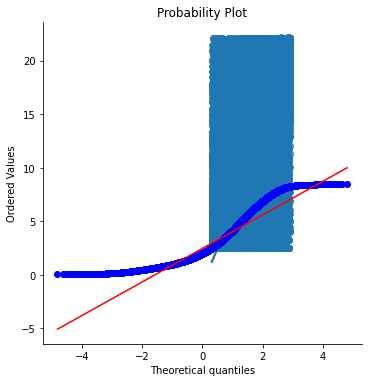

In [ ]:
data['D_sqrt'] = np.sqrt(data['D'])   #  square root transformation of the distance
sns.lmplot(x='D_sqrt', y='fare_amount', data=data,order=1) 
stats.probplot(data['D'], dist='norm', plot=plt)

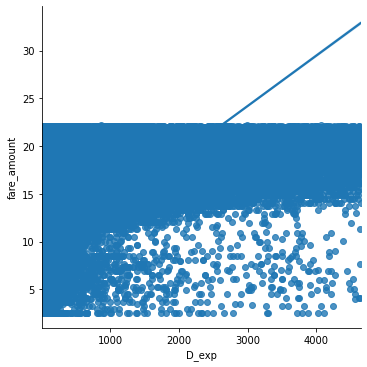

In [ ]:
data['D_exp'] = np.exp(data['D'])   # exponential transformation of the distance
sns.lmplot(x='D_exp', y='fare_amount', data=data,order=1) 

Some more powerful transformers are applied to the distance

In [ ]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='box-cox', standardize=False)
data['D_bc']=transformer.fit_transform(data[['D']])


((array([-4.8079561 , -4.62749065, -4.52990331, ...,  4.52990331,
          4.62749065,  4.8079561 ]),
  array([0.09396361, 0.09398447, 0.0940711 , ..., 1.62307973, 1.62308676,
         1.62308688])),
 (0.3086873491258089, 0.9410328073734625, 0.995172744392679))

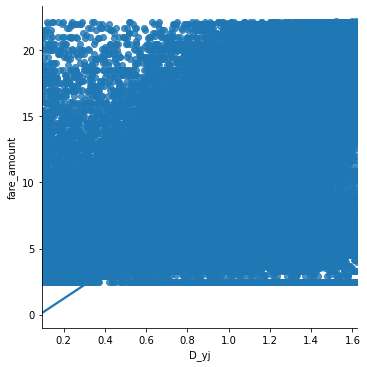

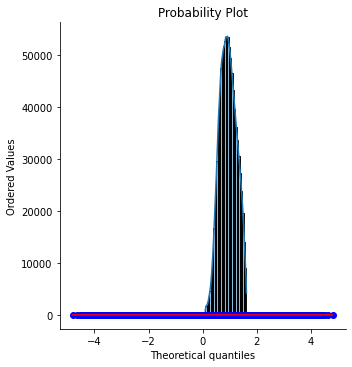

In [ ]:
transformer1 = PowerTransformer(method='yeo-johnson', standardize=False)
data['D_yj']=transformer1.fit_transform(data[['D']])

sns.lmplot(x='D_yj', y='fare_amount', data=data,order=1) 
sns.displot(data['D_yj'], bins=30, kde=True)  
stats.probplot(data['D_yj'], dist='norm', plot=plt)

In [ ]:
transformer1 = PowerTransformer(method='yeo-johnson', standardize=False)
data['D_yj']=transformer1.fit_transform(data[['D']])

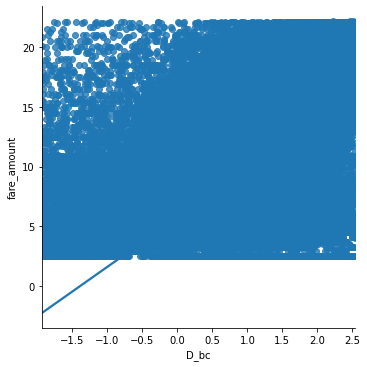

In [ ]:
sns.lmplot(x='D_bc', y='fare_amount', data=data,order=1) 

Distribution plots of all features including the transformed ones

<function matplotlib.pyplot.show>

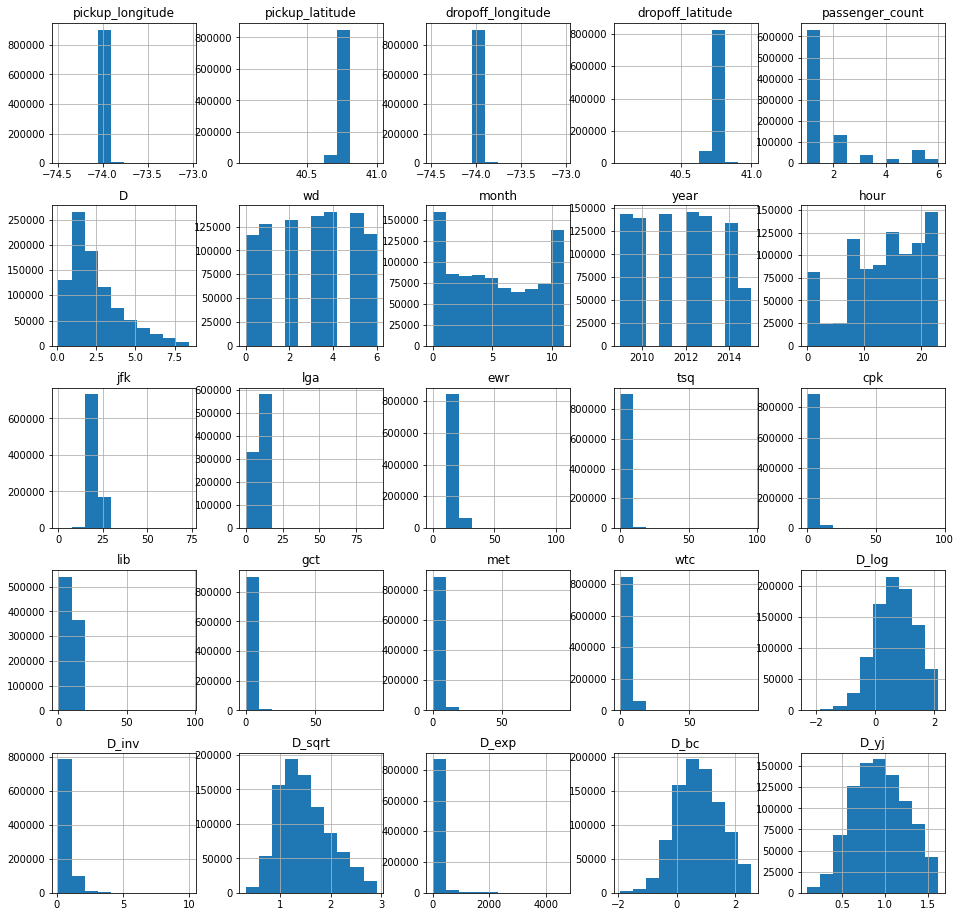

In [ ]:
features=data.drop(columns='fare_amount', axis=1)
features.hist(figsize=(16,16))
plt.show

Heat map of correlataion between features

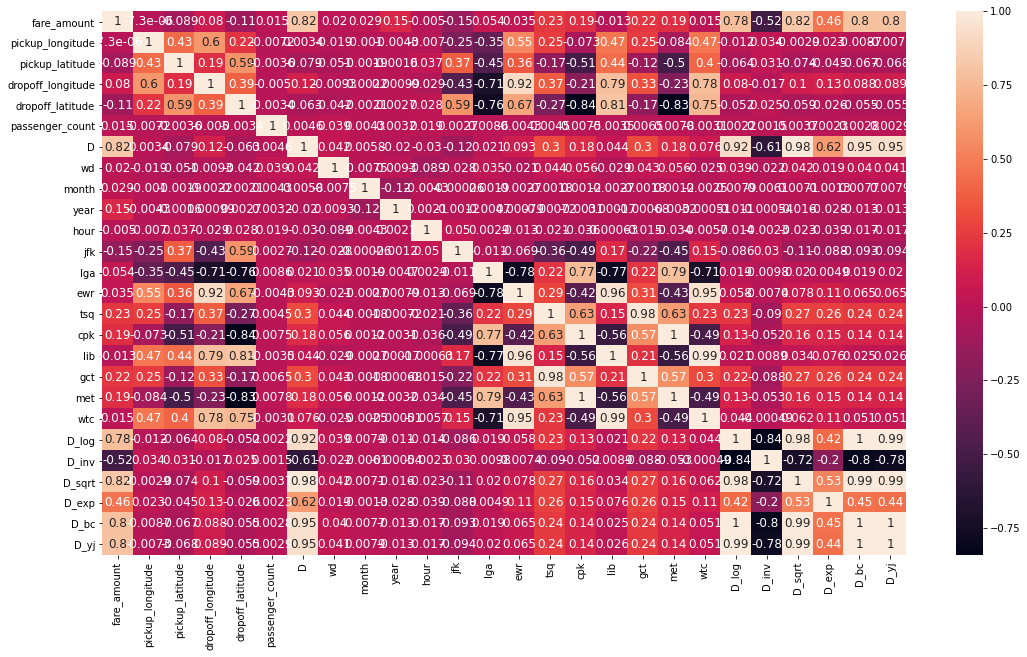

In [ ]:
c = data.corr() 
plt.subplots(figsize=(18,10))
sns.heatmap(c, annot = True, annot_kws = {'size' : 12})
plt.show()

From the heat map we can see that the square-root transformation of the distance  has the same correlation to the fare amount as the distance

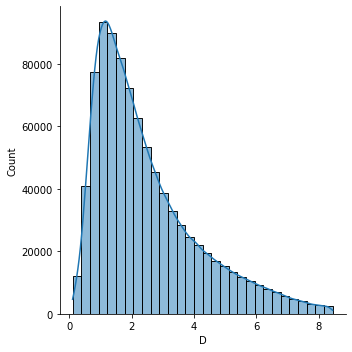

In [ ]:
sns.displot(data['D'], bins=30, kde=True)     ## right skewed distribution

Comparison in terms of Q-Q plots of distance and square root of distance

((array([-4.8079561 , -4.62749065, -4.52990331, ...,  4.52990331,
          4.62749065,  4.8079561 ]),
  array([0.10003672, 0.10006036, 0.10015848, ..., 8.44308796, 8.44322007,
         8.44322241])),
 (1.5666752760454825, 2.462914200205465, 0.9460429422598249))

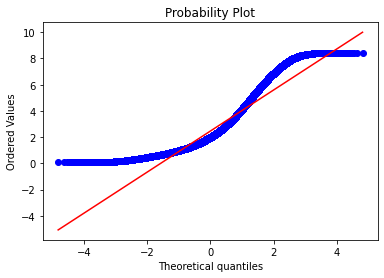

In [ ]:
## Q-Q plot - to check normal distribution and linear relationship

stats.probplot(data['D'], dist='norm', plot=plt)

((array([-4.8079561 , -4.62749065, -4.52990331, ...,  4.52990331,
          4.62749065,  4.8079561 ]),
  array([0.31628582, 0.31632319, 0.31647825, ..., 2.90569922, 2.90572195,
         2.90572236])),
 (0.49610660326848005, 1.4866152744225387, 0.986523368048678))

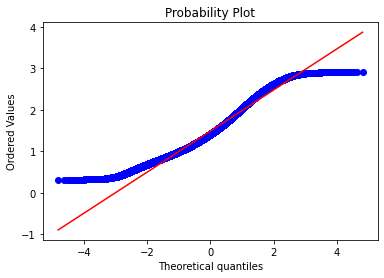

In [ ]:
stats.probplot(data['D_sqrt'], dist='norm', plot=plt)

From the Q-Q plot and the previous distribution plot it can be seen that the square-root of the distance approximates a normal distribution and a linear relationsgip slightly better than for the untransformed distance. 

Comparison of homoscedasticity of D and sqrt of D

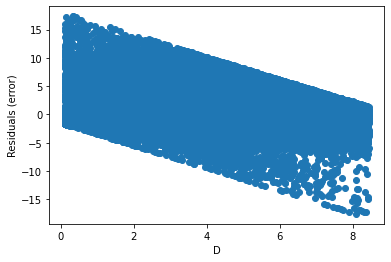

5.112834752654155

In [ ]:
## homocedasticity of D
x_train, x_test, y_train, y_test = train_test_split(data[['D']], data['fare_amount'], test_size=0.2)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
error=y_test-y_pred
plt.scatter(x=x_test, y=error)
plt.xlabel('D')
plt.ylabel('Residuals (error)')
plt.show()
mean_squared_error(y_test,y_pred)

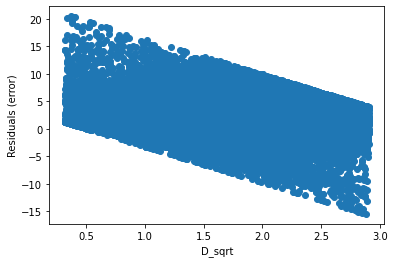

5.212224717028432

In [ ]:
## homocedasticity of D_sqrt
x_train, x_test, y_train, y_test = train_test_split(data[['D_sqrt']], data['fare_amount'], test_size=0.2)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
error=y_test-y_pred
plt.scatter(x=x_test, y=error)
plt.xlabel('D_sqrt')
plt.ylabel('Residuals (error)')
plt.show()
mean_squared_error(y_test,y_pred)

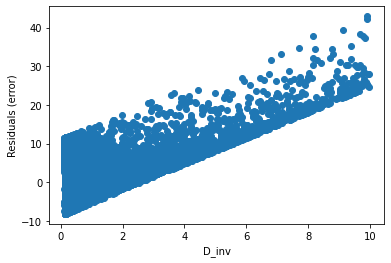

11.782693232880664

In [ ]:

## homocedasticity of D_inv
x_train, x_test, y_train, y_test = train_test_split(data[['D_inv']], data['fare_amount'], test_size=0.2)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
error=y_test-y_pred
plt.scatter(x=x_test, y=error)
plt.xlabel('D_inv')
plt.ylabel('Residuals (error)')
plt.show()
mean_squared_error(y_test,y_pred)


##Prediction using best transformed feature of distance and year

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909157 entries, 0 to 909156
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        909157 non-null  float64
 1   pickup_longitude   909157 non-null  float64
 2   pickup_latitude    909157 non-null  float64
 3   dropoff_longitude  909157 non-null  float64
 4   dropoff_latitude   909157 non-null  float64
 5   passenger_count    909157 non-null  int64  
 6   D                  909157 non-null  float64
 7   wd                 909157 non-null  int64  
 8   month              909157 non-null  int64  
 9   year               909157 non-null  int64  
 10  hour               909157 non-null  int64  
 11  jfk                909157 non-null  float64
 12  lga                909157 non-null  float64
 13  ewr                909157 non-null  float64
 14  tsq                909157 non-null  float64
 15  cpk                909157 non-null  float64
 16  li

In [ ]:
m = len(data)
x1 = data.iloc[:,22].values.reshape(m,1)
x2 = data.iloc[:,9].values.reshape(m,1)
X = np.append(x1,x2,axis=1)
X

array([[1.01469244e+00, 2.00900000e+03],
       [1.17861451e+00, 2.01100000e+03],
       [1.67206150e+00, 2.01200000e+03],
       ...,
       [1.41924487e+00, 2.01200000e+03],
       [1.20990278e+00, 2.01400000e+03],
       [1.69129299e+00, 2.01500000e+03]])

In [ ]:
y = data.iloc[:,0].values

In [ ]:
## Linear regression considering only sqrt-distamce and year

import sklearn.model_selection
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



scale = StandardScaler()            # feature scaling
X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2, random_state=0)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2, random_state=0)
model=linear_model.LinearRegression()
model.fit(X_train,y_train)

predictions=model.predict(X_test)

## Evaluation of prediction ##
r2 = sklearn.metrics.r2_score(y_test, predictions)
EV = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE = sklearn.metrics.max_error(y_test, predictions)
MAE = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)
r2, EV, MaxE, MAE, MSE 

(0.7041651983947073,
 0.7041652174245945,
 20.901065771684515,
 1.565391946586112,
 4.74569580090678)

Using the sqrt-distance and year (scaled) for prediction with linear regression performs poorer, as the accuracy is smaller. The other evaluation metrics are almost the same as in the case of using the real distance. 

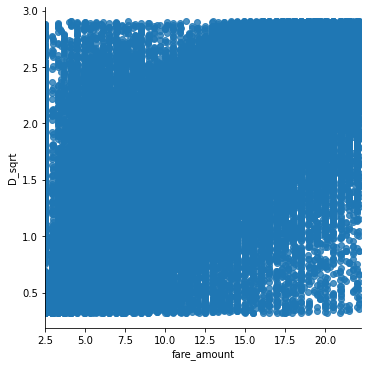

In [ ]:
sns.lmplot(x='fare_amount', y='D_sqrt', data=data,order=1)     